In [1]:
%matplotlib inline
import os
import ipywidgets as widgets
from matplotlib import pyplot as plt

param_path = widgets.Text(
    description = 'param path'
)


epoch_path = widgets.Text(
    description = 'checkpoint path'
)


display(param_path)
display(epoch_path)

Text(value='', description='param path')

Text(value='', description='checkpoint path')

In [11]:
import configparser
config = configparser.ConfigParser()
config.read(param_path.value)

nz = int(config['NN']['nz'])
ngf = int(config['NN']['ngf'])
ndf = int(config['NN']['ndf'])

im_size = int(config['Training']['im_size'])

In [17]:
import dcgan
import torch
from torch import nn
nc = 1

def init_weights(m):
    if type(m) == nn.Conv3d:
        m.weight.data.normal_(0.0, 0.02)
    elif type(m) == nn.BatchNorm3d:
        m.weight.data.normal_(1.0, 0.02)
        m.bias.data.fill_(0)        

netG = dcgan.make_generator_model(im_size, nz, nc, ngf)
netG.apply(init_weights)

Sequential(
  (0): ConvTranspose3d(512, 512, kernel_size=(4, 4, 4), stride=(1, 1, 1), bias=False)
  (1): BatchNorm3d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): ConvTranspose3d(512, 256, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (4): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace)
  (6): ConvTranspose3d(256, 128, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (7): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU(inplace)
  (9): ConvTranspose3d(128, 64, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (10): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU(inplace)
  (12): ConvTranspose3d(64, 1, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (13): Tanh()
)

In [18]:
device = torch.device('cpu')
netG.load_state_dict(torch.load(epoch_path.value))

IncompatibleKeys(missing_keys=[], unexpected_keys=[])

In [19]:
netG.eval()

Sequential(
  (0): ConvTranspose3d(512, 512, kernel_size=(4, 4, 4), stride=(1, 1, 1), bias=False)
  (1): BatchNorm3d(512, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (2): ReLU(inplace)
  (3): ConvTranspose3d(512, 256, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (4): BatchNorm3d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (5): ReLU(inplace)
  (6): ConvTranspose3d(256, 128, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (7): BatchNorm3d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (8): ReLU(inplace)
  (9): ConvTranspose3d(128, 64, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (10): BatchNorm3d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (11): ReLU(inplace)
  (12): ConvTranspose3d(64, 1, kernel_size=(4, 4, 4), stride=(2, 2, 2), padding=(1, 1, 1), bias=False)
  (13): Tanh()
)

In [20]:
BATCH_SIZE = 1

noise = torch.rand((BATCH_SIZE,nz,1,1,1))
fake = netG(noise)


In [22]:
img = fake.detach().numpy()[0,0,:,:,:]


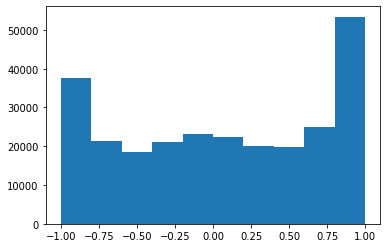

In [23]:
fig, ax = plt.subplots()
ax.hist(img.flatten())
plt.show()

In [24]:
from skimage.filters import threshold_otsu

thresh = threshold_otsu(img)
binary = img > thresh

In [25]:
from ipywidgets import interactive

def f(img):
    def func(z):
        fig, ax = plt.subplots()
        ax.imshow(img[:,:,z], cmap = 'gray')
        plt.show()
    return func

disp_img = f(img)

interactive_plot = interactive(disp_img, z=(0,img.shape[2]))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=32, description='z', max=64), Output(layout=Layout(height='350px'))), _d…

In [26]:
disp_img = f(binary)

interactive_plot = interactive(disp_img, z=(0,binary.shape[2]))
output = interactive_plot.children[-1]
output.layout.height = '350px'
interactive_plot

interactive(children=(IntSlider(value=32, description='z', max=64), Output(layout=Layout(height='350px'))), _d…